# TP1 Prétraitement acoustique et Analyse en Composantes Principales

NOM - PRÉNOM : BORDES Dorian

Déposer le notebook sur moodle à la fin de la séance. 

In [1]:
import numpy as np
import scipy.io.wavfile as wav
from TP1.canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import os

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION 
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 
 

In [2]:
# Définition de la fonction lecture
cheminFichiers = "./TP1/Signal/"
def lecture(voyelle, nbFichiers) :
    obs = []
    for i in range(nbFichiers):
        if i < 10 :
            fichier = voyelle + "0" + str(i) + ".wav"

        else :
            fichier = voyelle + str(i) + ".wav"

        (fech, sig) = wav.read(cheminFichiers + fichier)
        res = canaux(sig, fech)
        obs.append(res)

    return np.matrix(obs)




In [3]:
# Lecture des 20 fichiers pour chacune des classes
obsaa = lecture('aa', 20)
obsuu = lecture('uu', 20)
obsii = lecture('ii', 20)
print(obsaa)

[[  48638.74418336 2567721.69469233 1093657.90804161  164581.07549552
   295508.06929961 1174988.70121854 2368480.1547271  3399558.22851852
  1061739.92571981 3285466.98157673 1714214.24476828 2142637.16134768
  1313426.91766663  358685.35689851  542473.73480968  593335.77861517
  2439841.61699835 3197076.14342288 1451488.5833974  1092544.73849554
   402329.11762309  305739.8204808   147566.26853045  214525.131271  ]
 [  53610.3296093  2199290.43468715  854066.99231213   84004.30880048
   222321.26690843  849025.59327251 2035417.38443354 1774625.90951
  1028730.64697375 1732431.35550208 1023047.91910307 1349288.1030683
  1173552.68192108  108210.70956494  449305.28266711  289495.80408466
  1210936.03278862 1765498.67248444  637500.74736293 1420240.39407716
   383794.93792858  233594.02701654   85780.87268737  126865.75255851]
 [  70010.62502577 2325359.59855499  840896.07441836   70859.53655659
   252381.05283978  823265.41142147 2068627.68765729 1418129.26201642
   990448.26879802 133

In [4]:
# Créer une matrice contenant l'ensemble des observations à traiter
R = np.vstack((obsaa, obsuu, obsii))
print(np.shape(R))

(60, 24)


In [5]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.

In [6]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales
matrice = np.cov(R.T)
print(np.shape(matrice))
Lambda, V = linalg.eig(matrice)
vpmax = []
valmax1 = 0
i1 = 0
valmax2 = 0
i2 = 0
for i in range(len(Lambda)):
     if(Lambda[i] > valmax1):
         valmax1 = Lambda[i]
         i1 = i
vpmax.append(valmax1)
for i in range(len(Lambda)):
    if((Lambda[i] > valmax2) and (i != i1)):
        valmax2 = Lambda[i]
        i2 = i
vpmax.append(valmax2)
print(vpmax)
print(i2)
print(np.shape(V))
print(V)

(24, 24)
[(5295554841433.579+0j), (465469342942.3679+0j)]
1
(24, 24)
[[-4.58258772e-03 -5.87687541e-04  1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02  7.72427670e-03 -2.70668054e-02  8.57658002e-02
  -7.82236117e-03  6.97944891e-02  1.01853962e-01 -2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]
 [-1.55786437e-01 -2.15067311e-01  1.95398337e-01  4.94891564e-01
  -5.21625919e-02  2.85349294e-01  4.64325543e-01  1.28179836e-01
  -9.91292135e-02  2.03672359e-01  8.42073578e-02  4.37662705e-01
   1.35183207e-02 -2.66367174e-02  8.30841488e-02  1.82106037e-01
  -1.83653102e-01 -3.19163806e-02  1.61380333e-02 -2.08417912e-02
   5.44392614e-02  1.74096172e-02  1.75280145e-02  1.68148947e-02]
 [-3.02068036e-01  2.23587692e-02  2.38907107e-01  5.55681084e-01
   2.42683933e-01  2.18058324e-01 -5.52970554e-01 -4.65583345e-02
   1.

In [7]:
# 2-  prendre les vercteurs propres correspondants
vectmax1 = V[i1]
vectmax2 = V[1]
vect = []
vect.append(vectmax1)
vect.append(vectmax2)
test = np.matrix(vect)
print(test)
print(np.shape(test))
passage = np.transpose(test)
print(np.shape(passage))

[[-4.58258772e-03 -5.87687541e-04  1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02  7.72427670e-03 -2.70668054e-02  8.57658002e-02
  -7.82236117e-03  6.97944891e-02  1.01853962e-01 -2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]
 [-1.55786437e-01 -2.15067311e-01  1.95398337e-01  4.94891564e-01
  -5.21625919e-02  2.85349294e-01  4.64325543e-01  1.28179836e-01
  -9.91292135e-02  2.03672359e-01  8.42073578e-02  4.37662705e-01
   1.35183207e-02 -2.66367174e-02  8.30841488e-02  1.82106037e-01
  -1.83653102e-01 -3.19163806e-02  1.61380333e-02 -2.08417912e-02
   5.44392614e-02  1.74096172e-02  1.75280145e-02  1.68148947e-02]]
(2, 24)
(24, 2)


In [8]:
# 3-  projeter R dans ce nouvel espace
res = np.dot(R, passage)
print(np.shape(res))

(60, 2)


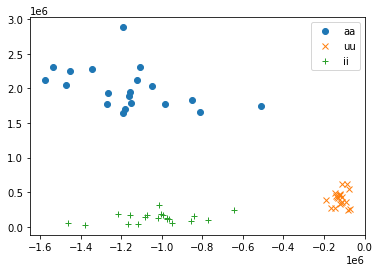

In [9]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.
plt.figure()
aa = res[:20, :]
uu = res[20:40, :]
ii = res[40:, :]
plt.plot(aa[:, 0], aa[:, 1], "o")
plt.plot(uu[:, 0], uu[:, 1], "x")
plt.plot(ii[:, 0], ii[:, 1], "+")
plt.legend(["aa", "uu", "ii"])

In [10]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?

(24, 24)
[]
(2, 24)
(24, 2)


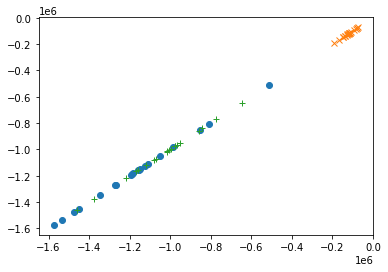

In [11]:
# Pour cela
# 5- rechercher les deux valeurs propres minimales

matrice = np.cov(R.T)
print(np.shape(matrice))
[Lambda, V] = linalg.eig(matrice)
vpmin = []
valmin1 = 0
i1 = 0
valmin2 = 0
i2 = 0
for i in range(len(Lambda)):
    if(Lambda[i] < valmin1):
        valmin1 = Lambda[i]
        i1 = i
vpmax.append(valmin1)
for i in range(len(Lambda)):
    if((Lambda[i] < valmin2) and (i != i1)):
        valmin2 = Lambda[i]
        i2 = i
vpmax.append(valmin2)
print(vpmin)
vectmin1 = V[i1]
vectmin2 = V[i2]
vect = []
vect.append(vectmin1)
vect.append(vectmin2)
test = np.matrix(vect)
print(np.shape(test))
passage = np.transpose(test)
print(np.shape(passage))
res = np.dot(R, passage)
plt.figure()

aa = res[:20, :]
uu = res[20:40, :]
ii = res[40:, :]
plt.plot(aa[:, 0], aa[:, 1], "o")
plt.plot(uu[:, 0], uu[:, 1], "x")
plt.plot(ii[:, 0], ii[:, 1], "+")

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires. 